## Image Classification

### Loading Dataset from keras.datasets module.

In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

### Visualizing some images from dataset.

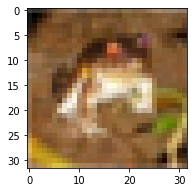

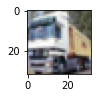

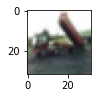

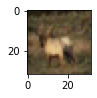

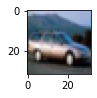

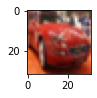

In [ ]:
n=6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
    plt.show()

In [ ]:
#Importing required libraries.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

### Converting to float and Scaling data with numpy array.

In [ ]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

### One Hot Encoder

In [ ]:
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

In [ ]:
train_Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

### Sequential Model

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),padding='same',activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
sgd=SGD(learning_rate=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [ ]:
model.fit(train_X,train_Y,validation_data=(test_X,test_Y),epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 209s 121ms/step - loss: 1.9295 - accuracy: 0.2935 - val_loss: 1.3944 - val_accuracy: 0.4971
Epoch 2/10
1563/1563 [==============================] - 200s 128ms/step - loss: 1.3872 - accuracy: 0.5012 - val_loss: 1.1871 - val_accuracy: 0.5821
Epoch 3/10
1563/1563 [==============================] - 191s 122ms/step - loss: 1.1708 - accuracy: 0.5804 - val_loss: 1.0815 - val_accuracy: 0.6178
Epoch 4/10
1563/1563 [==============================] - 190s 122ms/step - loss: 1.0504 - accuracy: 0.6268 - val_loss: 1.0262 - val_accuracy: 0.6391
Epoch 5/10
1563/1563 [==============================] - 195s 125ms/step - loss: 0.9438 - accuracy: 0.6657 - val_loss: 0.9732 - val_accuracy: 0.6573
Epoch 6/10
1563/1563 [==============================] - 204s 130ms/step - loss: 0.8501 - accuracy: 0.6988 - val_loss: 0.9570 - val_accuracy: 0.6645
Epoch 7/10
1563/1563 [==============================] - 192s 123ms/step - loss: 0.7982 - accuracy: 0.7167 - val_

### Accuracy

In [ ]:
_,acc=model.evaluate(test_X,test_Y)
print('Accuracy:',acc*100)

313/313 [==============================] - 5s 17ms/step - loss: 0.8956 - accuracy: 0.6934
Accuracy: 69.34000253677368


In [ ]:
model.save("model1_cifar_10epoch.h5")

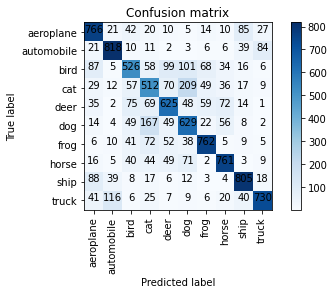

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    thresh=0
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black"if cm[i, j] > thresh else"black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Predict the values from the validation dataset
Y_pred = model.predict(test_X)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(test_Y,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
classes=[
   'aeroplane',
   'automobile','bird',
   'cat',
   'deer',
   'dog',
   'frog',
   'horse',
   'ship',
   'truck'
])

In [ ]:
from sklearn.metrics import classification_report
classes=[
   'aeroplane',
   'automobile','bird',
   'cat',
   'deer',
   'dog',
   'frog',
   'horse',
   'ship',
   'truck'
]
print(classification_report(Y_true, Y_pred_classes, target_names = classes))


              precision    recall  f1-score   support

   aeroplane       0.69      0.77      0.73      1000
  automobile       0.79      0.82      0.81      1000
        bird       0.62      0.53      0.57      1000
         cat       0.51      0.51      0.51      1000
        deer       0.64      0.62      0.63      1000
         dog       0.56      0.63      0.59      1000
        frog       0.77      0.76      0.77      1000
       horse       0.76      0.76      0.76      1000
        ship       0.78      0.81      0.79      1000
       truck       0.82      0.73      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



### Predictions

C:\Users\sreer\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


5 dog


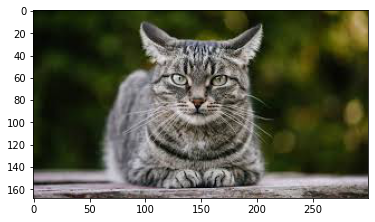

In [ ]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open("cat.jpg")
plt.imshow(im)
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

3 cat


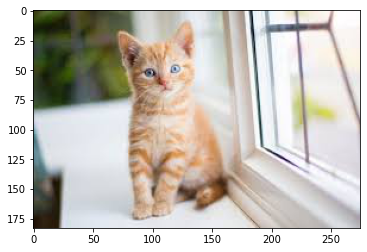

In [ ]:
im=Image.open("cat1.jpg")
plt.imshow(im)
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

3 cat


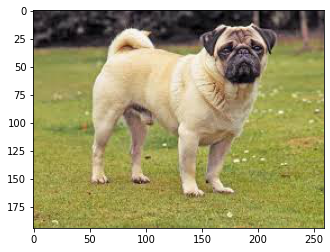

In [ ]:
im=Image.open("dog.jpg")
plt.imshow(im)
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

0 aeroplane


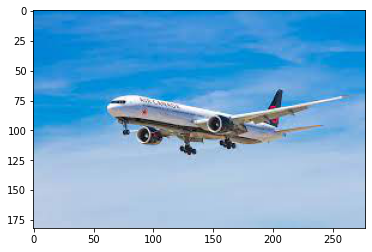

In [ ]:
im=Image.open("aeroplane.jpg")
plt.imshow(im)
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

9 truck


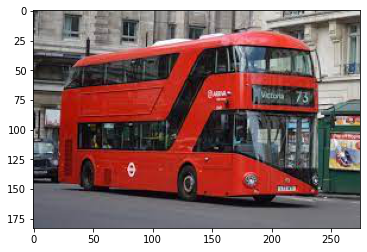

In [ ]:
im=Image.open("bus.jpg")
plt.imshow(im)
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])